# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

## First, explore the dataframe a bit.

In [2]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [3]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1.  Is the distribution of body temperatures normal?

In [4]:
#
# ECDF function.
#
def ecdf(data):
    """ Compute ECDF for a one-dimensional array of measurements """
     
    # Numer of data points: n
    n = len(data)
     
    # x-data for the ecdf: x
    x = np.sort(data)
     
    # y-data for the ecdf: y
    y = np.arange(1, len(x) + 1) / n
     
    return x, y

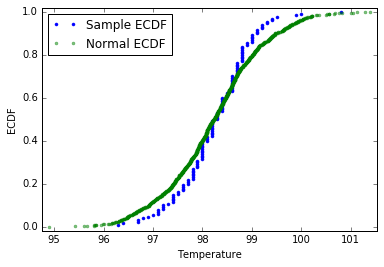

In [5]:
#
# Plot the ECDF of the data.
#
x,y = ecdf(df.temperature)
plt.plot(x, y, linestyle='none', marker='.')

#
# Generate and overlay a normal distrubution ECDF, centered at sample mean.
#
norm = np.random.normal(np.mean(df.temperature), size=1000)
x,y = ecdf(norm)
plt.plot(x, y, linestyle='none', marker='.', alpha=0.5)

#
# Configure plot options.
#
plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.legend(['Sample ECDF', 'Normal ECDF'], loc='upper left')
plt.margins(0.02)

#
# Show the plot.
#
plt.show()

In [6]:
#
# Run the normal test as well.
#
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

### Result

- The distribution of the temperatures apears to be mostly normal.  From the normal test, the probability of observing a normal distribution from the population is 26%.

## 2. Is the sample size large? Are the observations independent?

In [7]:
#
# Print the number of samples.
#
num_samples = len(df.temperature)
print(num_samples)

130


### Result

- The sampe size is not large at 130 samples.  
- Yes, the samples are assumed to be independent.

## 3. Is the true population mean really 98.6 degrees F?

- Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the t or z statistic?
- Now try using the other test. How is the result be different? Why?

In [40]:
#
# Run the one-sample t test.
#
samples = df.temperature
stats.ttest_1samp(samples, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [41]:
#
# Generate a normal population with mean at 98.6.  This is used to 
# approximate the population so that the standard deviation and mean can 
# be used for the z test.
#
np.random.seed(42)
pop = np.random.normal(98.6, size=num_samples)

#
# Calculate the z statistic.
#
sample_mean = np.mean(samples)
pop_dev = np.std(pop)
z = (sample_mean - 98.6) / (pop_dev / np.sqrt(num_samples))

#
# Calcualte the p value from the z score.
#
stats.norm.cdf(z)


9.8514323036826139e-06

### Result

- A one-sample test should be used as we are comparing a sample with a population.

- A t-test should be used as the population standard deviation is unknown. The probability of observing a sample mean of 98.6 from the population is 2.4e-7 (quite small).  Therefore, based on the result of the one-sample t-test, we can reject the null hypothesis that µ=98.6.

- From the z statistic/test the p value for the the computed z score is 9.85e-06.  A normal population is generated so that is standard deviation can be used for the z score computation.  This result is different than the t-test as the standard deviation is unknown and therefore had to be simulated.

## 4 Draw a small sample of size 10 from the data and repeat both tests.

- Which one is the correct one to use?
- What do you notice? What does this tell you about the difference in application of the t and z  statistic?

In [42]:
#
# Draw a random 10 samples.
#
np.random.seed(42)
samples = np.random.choice(df.temperature, 10)

#
# Run the one-sample t test.
#
stats.ttest_1samp(samples, 98.6)

Ttest_1sampResult(statistic=-3.0934479202257976, pvalue=0.012857704604809363)

In [55]:
#
# Generate a normal population with mean at 98.6.  This is used to 
# approximate the population so that the standard deviation and mean can 
# be used for the z test.
#
np.random.seed(42)
pop = np.random.normal(98.6, size=10)

#
# Calculate the z statistic.
#
sample_mean = np.mean(samples)
pop_dev = np.std(pop)
z = (sample_mean - 98.6) / (pop_dev / np.sqrt(num_samples))

#
# Calcualte the two-tail p value from the z score.
#
stats.norm.cdf(z)

3.0483749540416056e-20

### Result

- The t test should be used in this case due to the smaller sample size.  Once n < 30 than the sample distribution is no longer considered normal and a z test is not appropriate.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

- Start by computing the margin of error and confidence interval.

In [12]:
#
# Calcualate the standard error.
#
se = stats.sem(df.temperature)

#
# Calculate the margin of error for a 99% confidence interval.
#
me = 2.58 * se

#
# Calculate and print the interval.
#
interval = [sample_mean - me, sample_mean + me]
print(interval)

[97.884094604558243, 98.215905395441752]


In [13]:
#
# Calculate the 99% confidence interval using scipy and compare with interval above.
#
interval = stats.t.interval(0.99, num_samples - 1, loc=sample_mean, scale=se)

#
# Print the interval with the margin of error.
#
print(interval)

(97.88187747316681, 98.218122526833184)


### Result

- At less than 97.88 or greater than 98.22 a persons temperature sould be considered abnormal.

## 6. Is there a significant difference between males and females in normal temperature?

- What test did you use and why?
- Write a story with your conclusion in the context of the original problem.

In [48]:
#
# Split the data into male and female.
#
males = df.temperature[df.gender == 'M']
females = df.temperature[df.gender == 'F']

#
# Run a two sample t-test on males and females.
# 
stats.ttest_ind(males, females)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

### Result

- After running a two-sample t-test between males and females, comparing the means, the p value is 0.024.  This value is not smaller than the 99% p value of 0.01, but it is smaller than the 95% p vlaue of 0.05.  Therefore taking the 99% p value the null hypothesis cannot be rejected.  In other words, the is no statistically significant difference in body temperature between males and females. 

- The origional problem asks if the mean body temperature of 98.6 is statistically correct.  A sample size of 130 samples, with half male and half female is provided for analysis.  Several tests were run to determine whether the sample mean is representative of a hypothetical population mean of 98.6.  It can be seen from the results that the true population mean is not 98.6.  Rather, the mean is 98.05 ± 0.166